In [2]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from IPython.display import display
from tqdm import tqdm
import matplotlib.pyplot as plt
from pathlib import Path
from typing import Tuple
import colorsys



Original Image GLCM Features
AV: [165.7263986  165.72291667 165.75087413 165.75294289]
Dissimilarity: [20.61248543 26.71687063 20.61248543 26.71687063]




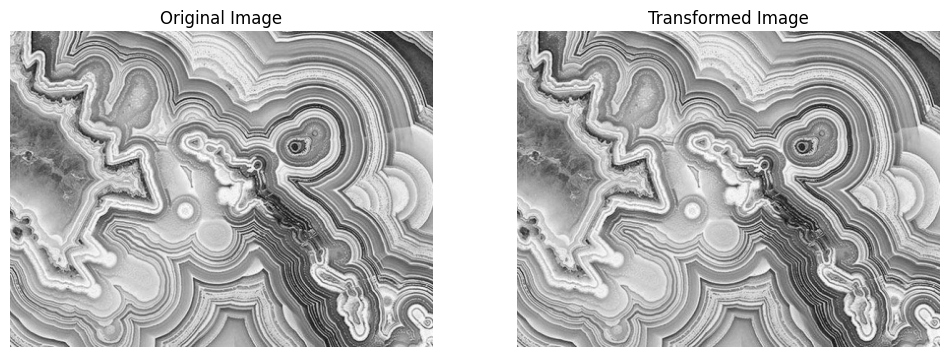

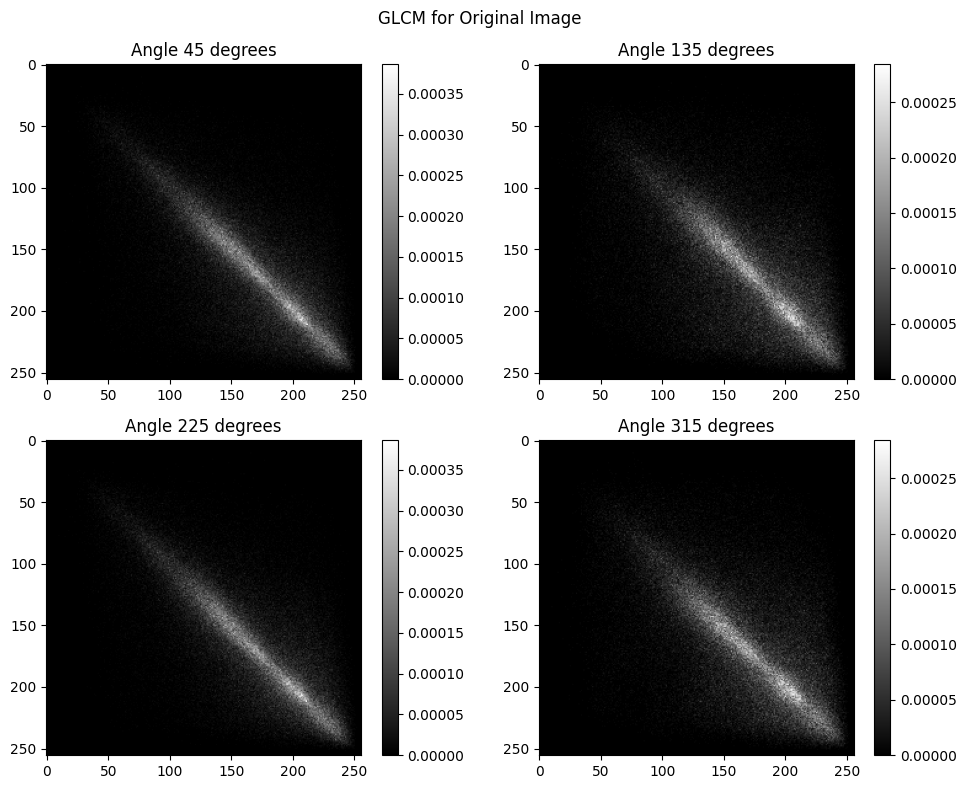

Transformed Image GLCM Features
AV: [82.61276224 82.61099213 82.62498543 82.62604895]
Dissimilarity: [10.30525932 13.35892337 10.30525932 13.35892337]




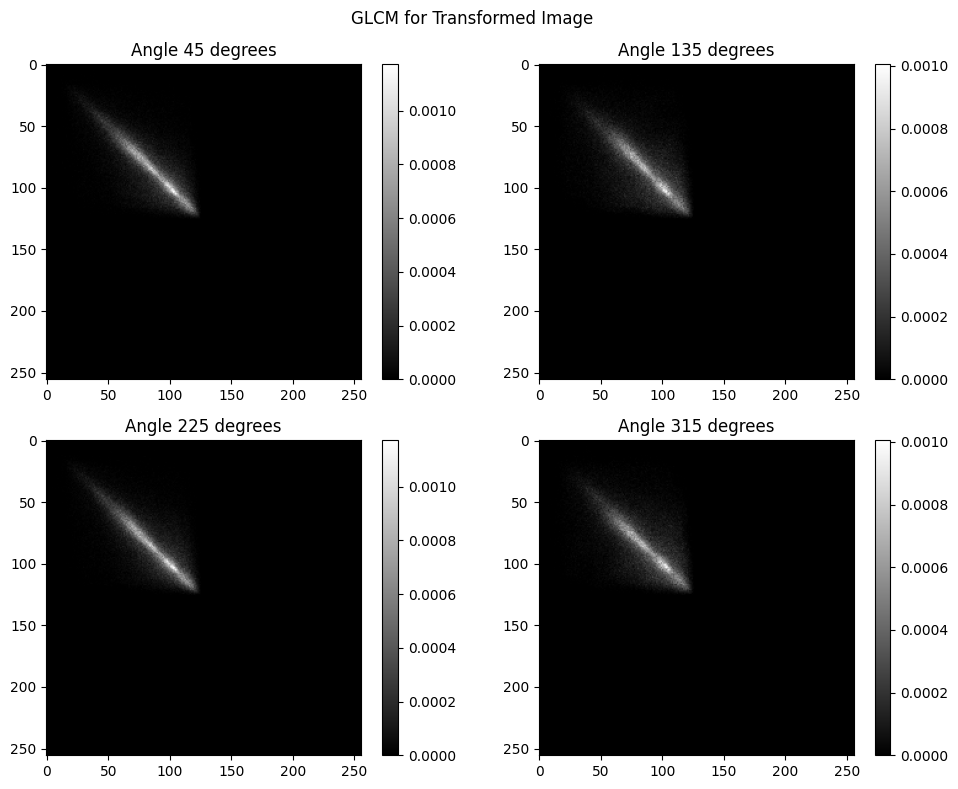

Original Image GLCM Features
AV: [110.78343944 110.78013181 110.81202109 110.8151076 ]
Dissimilarity: [14.04441035 14.065546   14.04441035 14.065546  ]




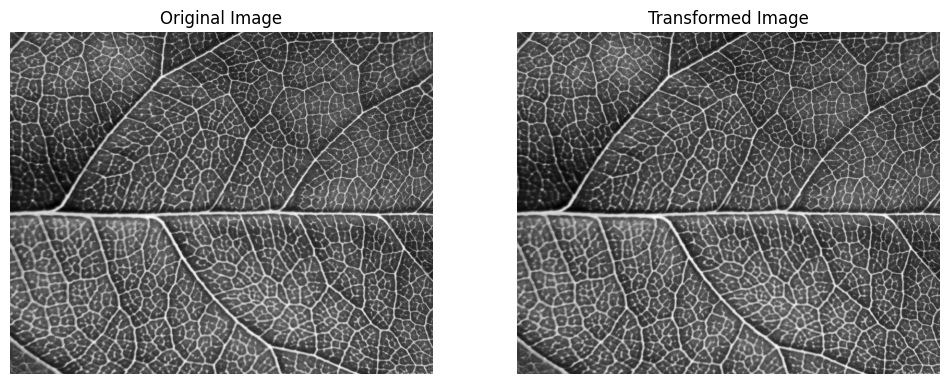

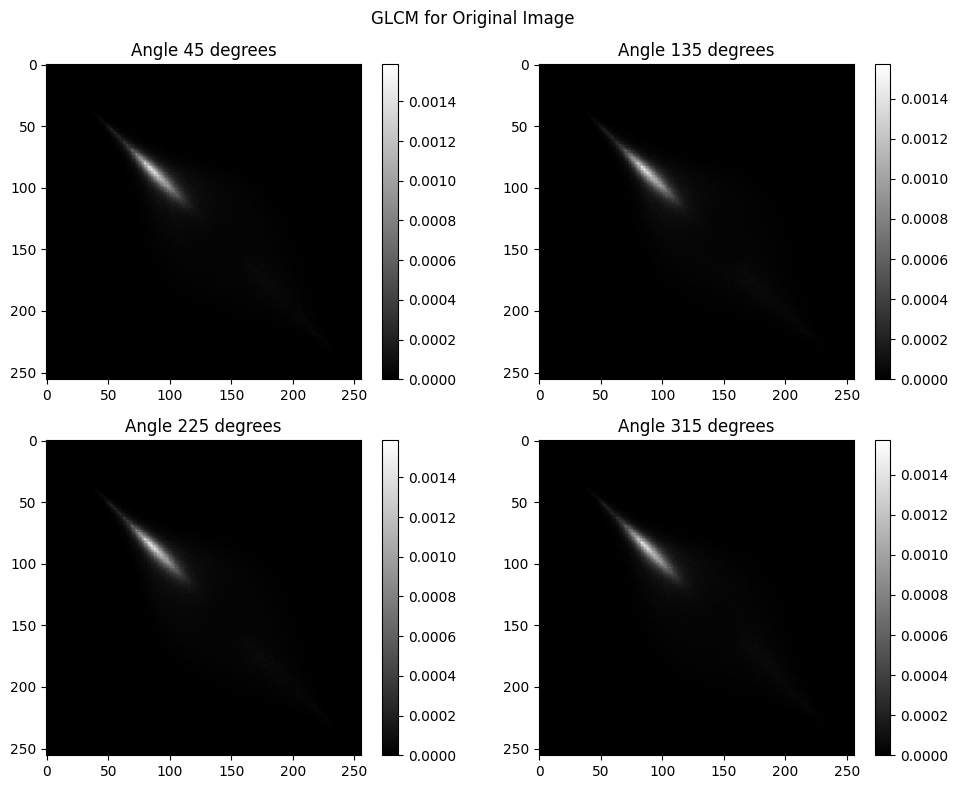

Transformed Image GLCM Features
AV: [55.14230477 55.14063868 55.15658562 55.15813962]
Dissimilarity: [7.02254838 7.03288126 7.02254838 7.03288126]




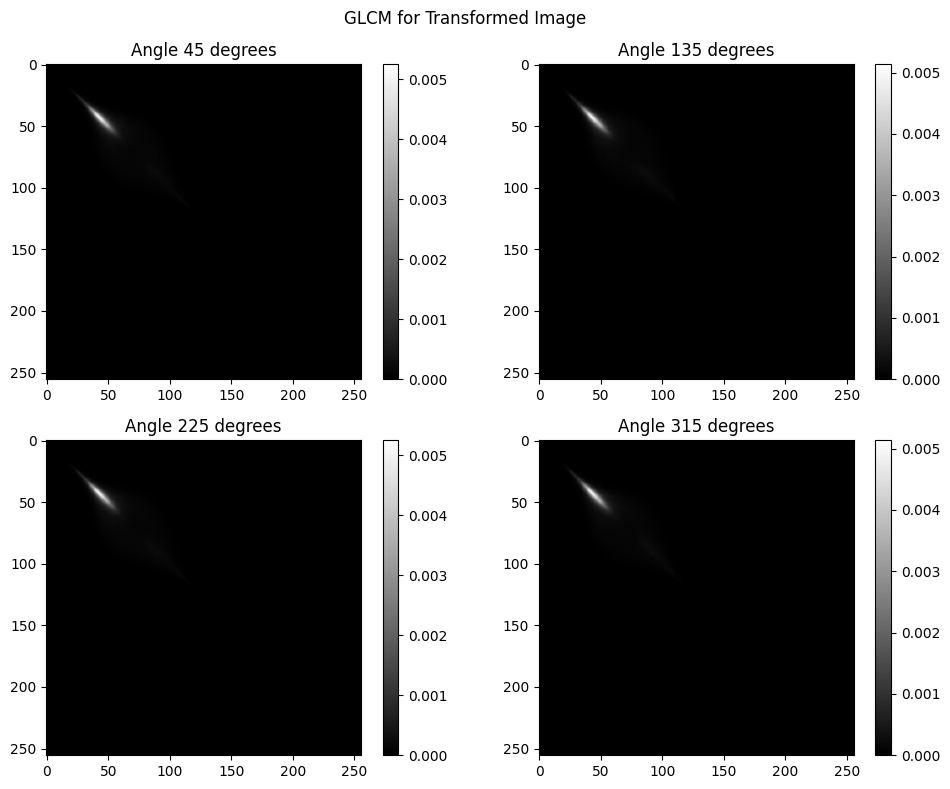

Original Image GLCM Features
AV: [110.5806729  110.64667489 110.63947104 110.57354427]
Dissimilarity: [26.34139283 25.99943756 26.34139283 25.99943756]




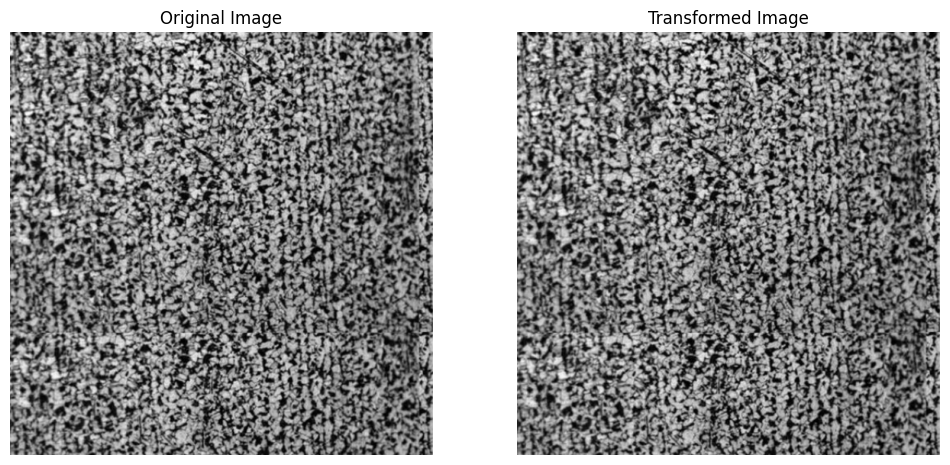

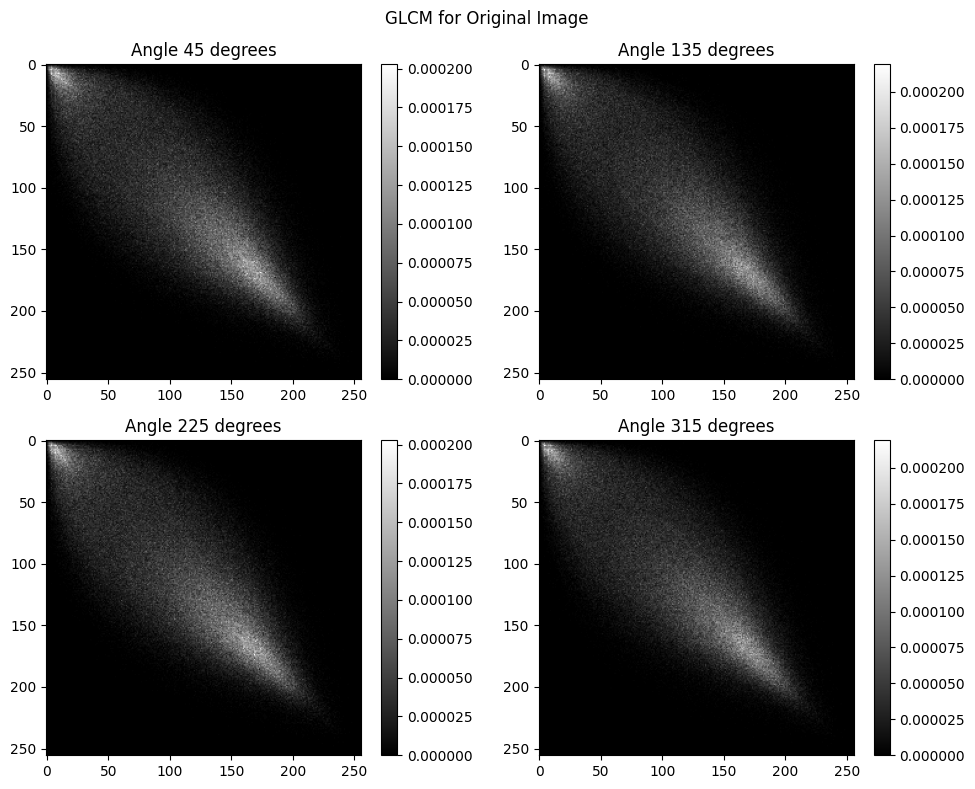

Transformed Image GLCM Features
AV: [55.04057435 55.07359823 55.0699914  55.03700349]
Dissimilarity: [13.17057379 12.99916942 13.17057379 12.99916942]




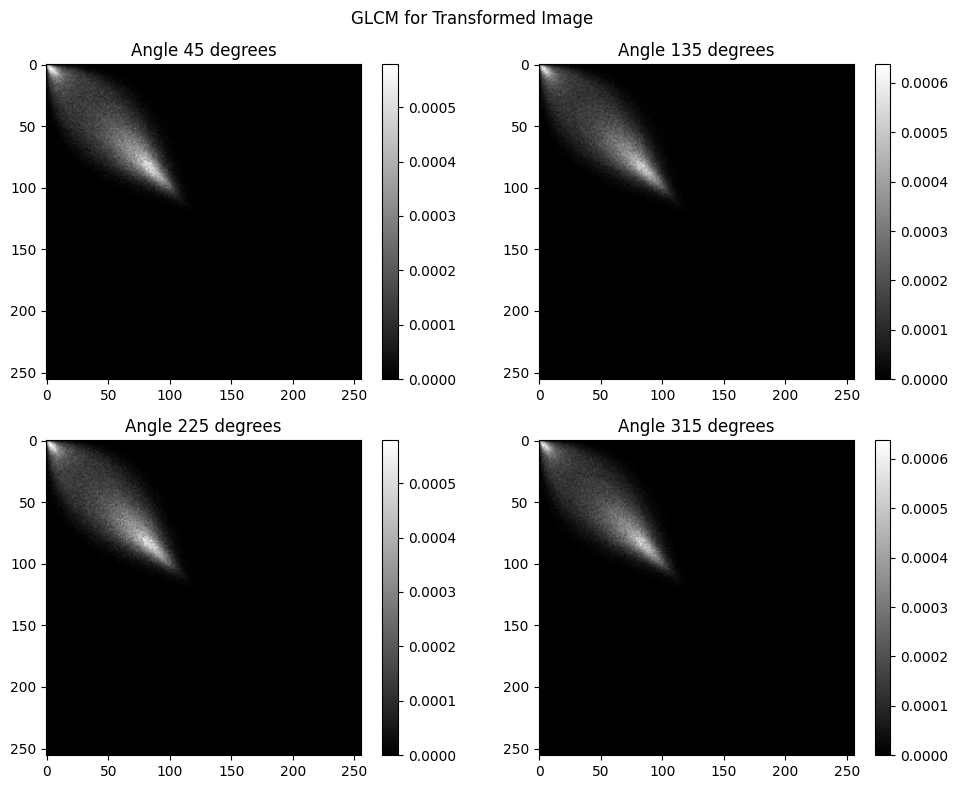

Original Image GLCM Features
AV: [140.27863123 140.40009408 140.45177591 140.33055426]
Dissimilarity: [21.96852078 23.37476179 21.96852078 23.37476179]




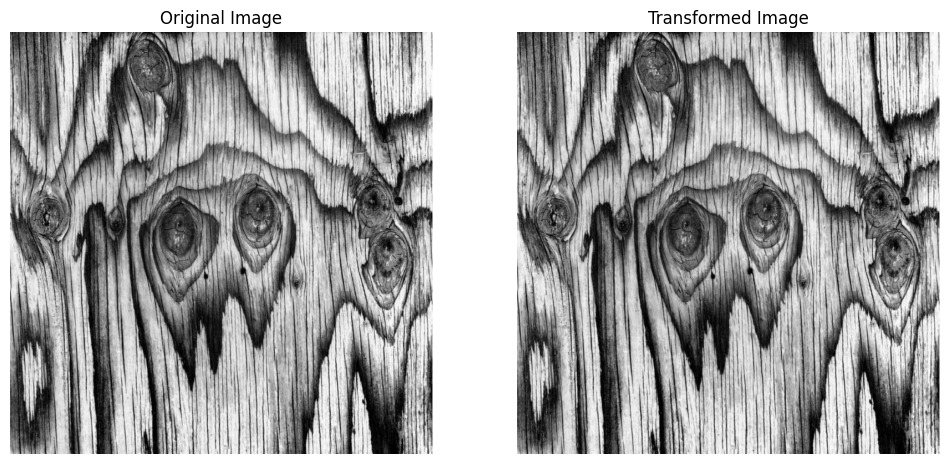

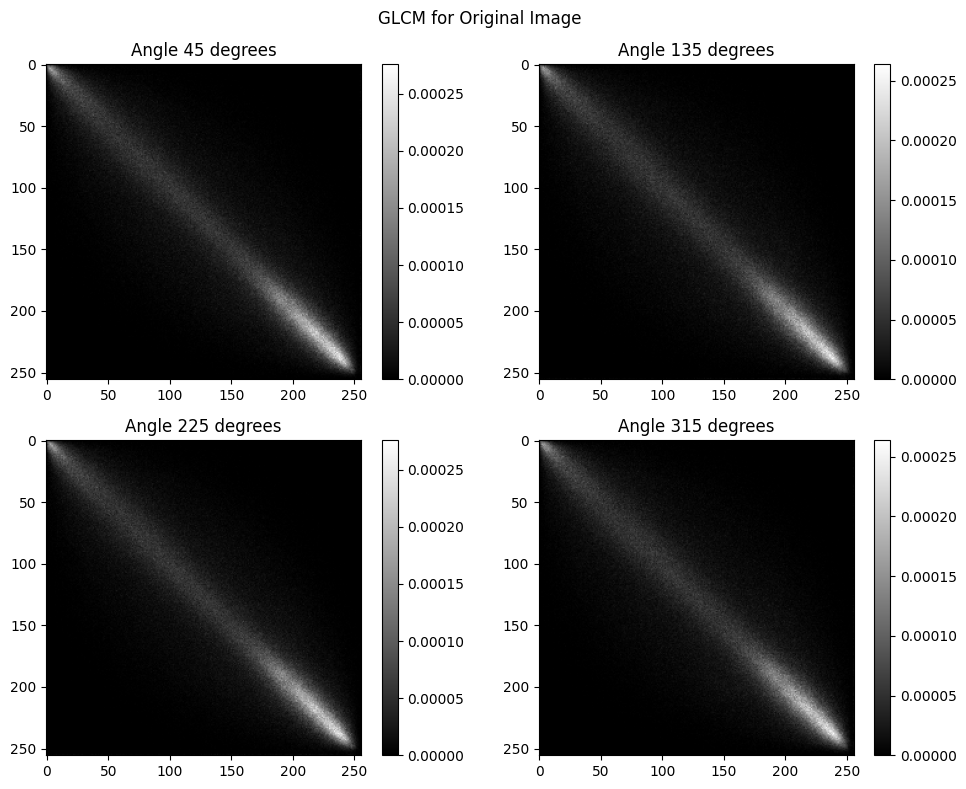

Transformed Image GLCM Features
AV: [69.8890392  69.94945377 69.97528495 69.91499173]
Dissimilarity: [10.98383192 11.6866056  10.98383192 11.6866056 ]




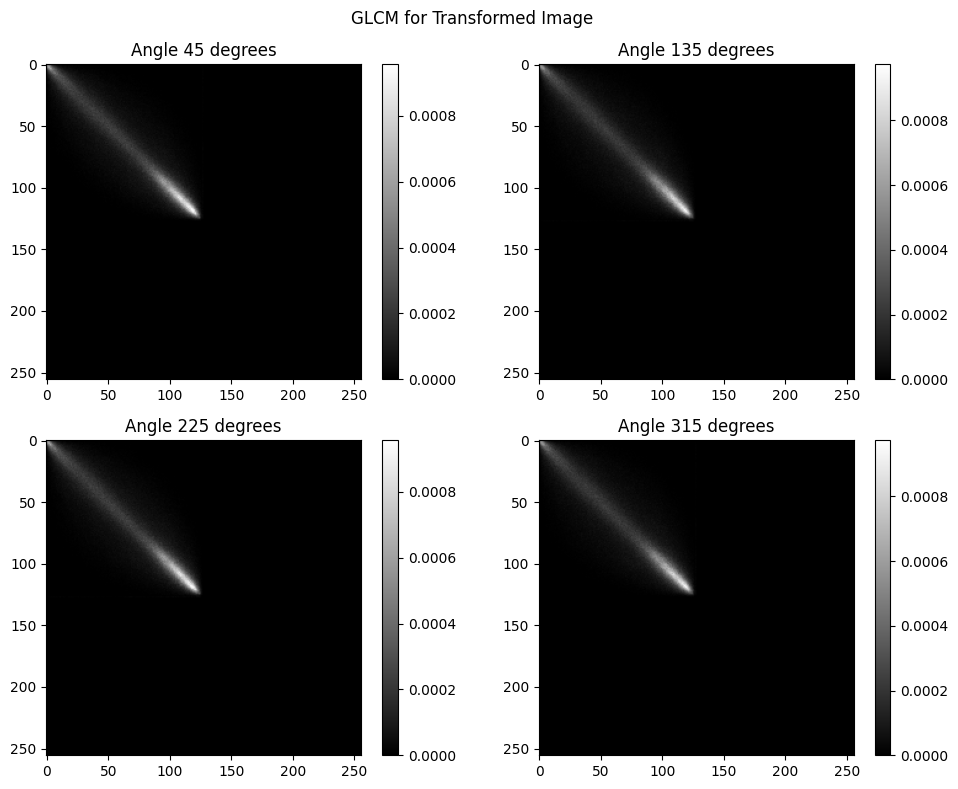

In [9]:
# Функция для вычисления матрицы Харалика вручную
def compute_glcm(image_array, distance, angles):
    height, width = image_array.shape
    max_gray_level = 256
    glcm = np.zeros((max_gray_level, max_gray_level, len(angles)), dtype=np.float64)
    
    for k, angle in enumerate(angles):
        for i in range(height):
            for j in range(width):
                row_offset = int(np.round(distance * np.sin(angle)))
                col_offset = int(np.round(distance * np.cos(angle)))
                neighbor_row = i + row_offset
                neighbor_col = j + col_offset
                
                if 0 <= neighbor_row < height and 0 <= neighbor_col < width:
                    glcm[image_array[i, j], image_array[neighbor_row, neighbor_col], k] += 1
    
    # Нормализация GLCM
    glcm_sum = np.sum(glcm, axis=(0, 1))
    glcm = glcm / glcm_sum[np.newaxis, np.newaxis, :]
    
    return glcm

# Функция для вычисления признаков AV и D из матрицы Харалика
def compute_glcm_features_av_d(glcm):
    num_levels = glcm.shape[0]
    num_angles = glcm.shape[2]
    
    av = np.zeros(num_angles)
    dissimilarity = np.zeros(num_angles)
    
    for k in range(num_angles):
        for i in range(num_levels):
            for j in range(num_levels):
                av[k] += glcm[i, j, k] * i
                dissimilarity[k] += glcm[i, j, k] * abs(i - j)
    
    return av, dissimilarity


def visualize_glcm(glcm, angles, image_name):
    plt.figure(figsize=(10, 8))
    for i, angle in enumerate(angles):
        plt.subplot(2, 2, i + 1)
        normalized_glcm = np.log1p(glcm[:, :, i])
        plt.imshow(normalized_glcm, cmap='gray', vmin=0, vmax=np.max(normalized_glcm))
        plt.title(f'Angle {int(np.degrees(angle))} degrees')
        plt.colorbar()
    plt.suptitle(f'GLCM for {image_name}')
    plt.tight_layout()
    plt.show()
    
# не понадобилось :(
def apply_brightness_transformation(image_path, c=1.5):
    image = Image.open(image_path).convert('RGB')
    image_array = np.array(image, dtype=np.float64) / 255.0
    
    hls_image = np.zeros_like(image_array)
    
    for i in range(image_array.shape[0]):
        for j in range(image_array.shape[1]):
            r, g, b = image_array[i, j]
            h, l, s = colorsys.rgb_to_hls(r, g, b)
            l = l * c  
            hls_image[i, j] = colorsys.hls_to_rgb(h, l, s)
    
    hls_image = (hls_image * 255).astype(np.uint8)
    transformed_image = Image.fromarray(hls_image)
    
    return image, transformed_image

def increase_contrast_grayscale(image, c=1.5):
    image_array = np.array(image, dtype=np.float64) / 255.0
    contrast_image_array = np.clip(image_array * c, 0, 1)
    contrast_image = Image.fromarray((contrast_image_array * 255).astype(np.uint8))
    return contrast_image
# Путь к папке с изображениями
folder_path = 'textures'

# Параметры матрицы Харалика
distance = 2
angles = [np.pi/4, 3*np.pi/4, 5*np.pi/4, 7*np.pi/4]

# Обработка всех изображений в папке
for image_path in Path(folder_path).glob('*'):
    if image_path.suffix.lower() in ['.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff']:
        #original_image, transformed_image = apply_brightness_transformation(image_path, c=1.5)
        original_gray = Image.open(image_path).convert('L')
        transformed_gray = increase_contrast_grayscale(original_gray,0.5)
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.imshow(original_gray, cmap='gray')
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(transformed_gray, cmap='gray')
        plt.title('Transformed Image')
        plt.axis('off')
        original_gray_array = np.array(original_gray)
        transformed_gray_array = np.array(transformed_gray)

        # Построение матрицы Харалика для исходного изображения
        glcm_original = compute_glcm(original_gray_array, distance, angles)
        av_original, dissimilarity_original = compute_glcm_features_av_d(glcm_original)
        
        print("Original Image GLCM Features")
        print(f"AV: {av_original}")
        print(f"Dissimilarity: {dissimilarity_original}")
        print("\n")

        #Визуализация матрицы Харалика для исходного изображения
        visualize_glcm(glcm_original, angles, 'Original Image')

        glcm_transformed = compute_glcm(transformed_gray_array, distance, angles)
        av_transformed, dissimilarity_transformed = compute_glcm_features_av_d(glcm_transformed)

        print("Transformed Image GLCM Features")
        print(f"AV: {av_transformed}")
        print(f"Dissimilarity: {dissimilarity_transformed}")
        print("\n")

        # Визуализация матрицы Харалика для преобразованного изображения
        visualize_glcm(glcm_transformed, angles, 'Transformed Image')
